# Reconnaissance d'entités nommées avec SpaCy

La documentation est accessible ici: https://spacy.io/api

## Imports

In [1]:
from collections import defaultdict
import spacy
from spacy.lang.fr.examples import sentences

In [2]:
nlp = spacy.load('fr_core_news_md')

In [3]:
# chargement du corpus
import os

data_path = "../../data/txt_tp4"
files = [f for f in os.listdir(data_path) if f.endswith(".txt")]

corpus_text = ""

for f in files:
    with open(os.path.join(data_path, f), "r", encoding="utf-8") as ff:
        corpus_text += ff.read() + "\n"


In [ ]:
# appliquation de Spacy, on traite chaque document individuellementite article par article sinon 
# le corpus est trop grande pour spacy
people = defaultdict(int)
places = defaultdict(int)
orgs = defaultdict(int)

for f in files:
    with open(os.path.join(data_path, f), "r", encoding="utf-8") as ff:
        text = ff.read()

    nlp = spacy.load("fr_core_news_md", disable=["parser", "tagger", "lemmatizer"])


    for ent in doc.ents:
        if ent.label_ == "PER":
            people[ent.text] += 1
        elif ent.label_ == "LOC":
            places[ent.text] += 1
        elif ent.label_ == "ORG":
            orgs[ent.text] += 1



In [ ]:
# afficher les 20 entités les plus fréquentes par catégorie
print("PERSONNES les plus citées :")
for p, n in sorted(people.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(f" - {p}: {n}")

print("\nLIEUX les plus cités :")
for p, n in sorted(places.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(f" - {p}: {n}")

print("\nORGANISATIONS les plus citées :")
for p, n in sorted(orgs.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(f" - {p}: {n}")


PERSONNES les plus citées :
 - Enf: 1822
 - Ag: 1612
 - Rossel: 1029
 - Mozart: 930
 - SENT: 872
 - M: 717
 - Beethoven: 698
 - P.f: 597
 - Bach: 467
 - H: 455
 - Monsieur: 438
 - Ea: 430
 - Musique: 427
 - Haydn: 396
 - R. T. B.: 385
 - Molière: 382
 - Brahms: 369
 - R.T.B.: 359
 - Schubert: 336
 - Roi: 322

LIEUX les plus cités :
 - F: 4789
 - Bruxelles: 3998
 - I: 2522
 - Paris: 1914
 - fr: 1863
 - A: 1800
 - Belgique: 1550
 - E.a: 1048
 - France: 966
 - Anvers: 888
 - Brux: 881
 - Liège: 875
 - Fr: 771
 - R.T.B.: 745
 - B: 712
 - Téléph: 667
 - Etat: 663
 - P: 647
 - Europe: 611
 - Luxembourg: 602

ORGANISATIONS les plus citées :
 - ena: 820
 - PF: 664
 - GALERIES: 642
 - ea: 632
 - EA: 601
 - ENA: 580
 - ALLEMAGNE: 561
 - LUXEMBOURG: 481
 - PARC: 419
 - LEOPOLD: 349
 - Techn: 339
 - EUROPE: 320
 - AFF: 315
 - Ena: 302
 - Conseil: 296
 - Variétés: 279
 - GAITE: 279
 - METRO: 262
 - SOTTENS: 216
 - For: 212


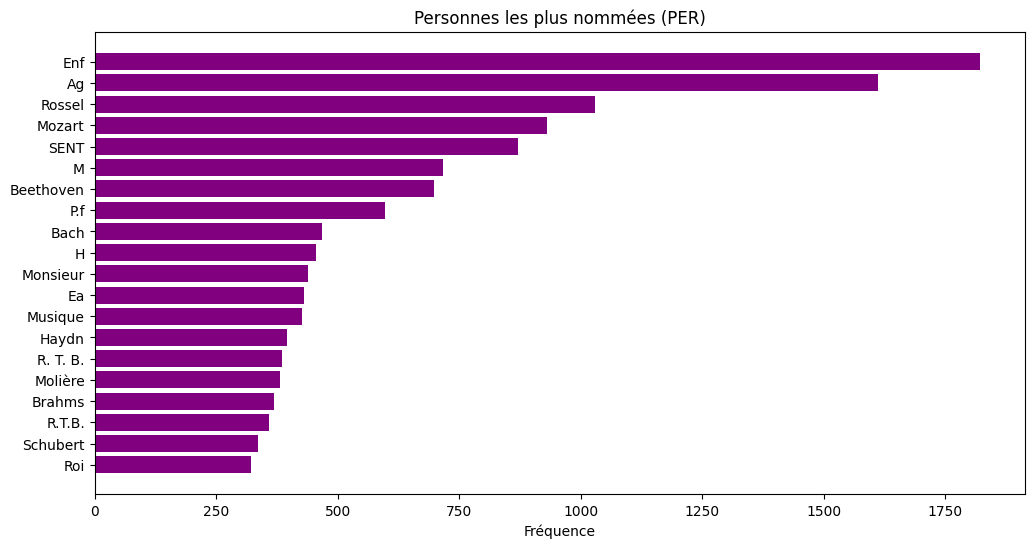

In [8]:
# graphique des personnes les plus citées
import matplotlib.pyplot as plt

def plot_top_dict(dico, title, top=20):
    items = sorted(dico.items(), key=lambda x: x[1], reverse=True)[:top]
    labels, values = zip(*items)

    plt.figure(figsize=(12,6))
    plt.barh(labels, values, color="purple")
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel("Fréquence")
    plt.show()

# Exemple :
plot_top_dict(people, "Personnes les plus nommées (PER)")


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# mots clés
mots_themes = {"sorcellerie","sorcière","witch","féminisme","femme","procès"}

# construire le réseau
G = nx.Graph()
cooc = defaultdict(int)

for f in files:
    text = open(os.path.join(data_path, f), encoding="utf-8").read()
    doc = nlp(text)
    words = [t.text.lower() for t in doc]

    # vérifier présence mots thématiques
    if any(m in " ".join(words) for m in mots_themes):
        for ent in doc.ents:
            if ent.label_ in {"PER","LOC","ORG"}:
                cooc[ent.text] += 1
                G.add_edge(ent.text, "Thème", weight=1)

# visualisation réseau
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G, k=0.5)

nx.draw(
    G, pos,
    with_labels=True,
    node_size=800,
    node_color="violet",
    edge_color="gray",
    font_size=8
)
plt.title("Graphique de cooccurrences entités ↔ thématique")
plt.show()


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x105e93ed0>>
Traceback (most recent call last):
  File "/Users/ilaria/Desktop/STIC/traitement_auto_corpus/tac/.venv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 797, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 
